# 🧠 Perceptron in Deep Learning


**Definition**:  
A perceptron is the simplest form of an artificial neural network, introduced by Frank Rosenblatt in 1958. It is a binary classifier that models a single neuron with a linear decision boundary, used to classify input data into two classes.

**Components**:  
1. **Inputs (x₁, x₂, ..., xₙ)**: Features of the input data, each associated with a weight (w₁, w₂, ..., wₙ).  
2. **Weights**: Parameters that determine the importance of each input.  
3. **Bias (b)**: A constant added to the weighted sum to shift the decision boundary.  
4. **Activation Function**: Typically a step function (e.g., outputs 1 if the weighted sum exceeds a threshold, otherwise 0).  
5. **Output**: Binary result (e.g., 0 or 1) based on the activation function.

**Working Principle**:  
- Computes the weighted sum of inputs: \( z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b \).  
- Applies the activation function to \( z \): \( \hat{y} = f(z) \).  
- Classifies inputs based on whether \( z \) exceeds a threshold.

**Learning Process**:  
- **Training**: Adjusts weights and bias to minimize classification errors using the perceptron learning rule.  
- **Learning Rule**: If a misclassification occurs, update weights as:  
  \( w_i \gets w_i + \eta (y - \hat{y}) x_i \), where \( \eta \) is the learning rate, \( y \) is the true label, and \( \hat{y} \) is the predicted label.  
- Iterates until the model correctly classifies all training data or reaches a maximum number of iterations.

**Limitations**:  
- Can only solve **linearly separable** problems (e.g., cannot solve XOR problem).  
- Limited to binary classification.  
- Does not handle non-linear data well, leading to the development of multi-layer perceptrons (MLPs).

**Applications**:  
- Basic binary classification tasks.  
- Foundation for more complex neural networks (e.g., MLPs, deep learning models).  
- Historical significance in understanding neural network principles.

**Relation to Deep Learning**:  
- A perceptron is a building block of neural networks.  
- Multi-layer perceptrons (MLPs) extend the single-layer perceptron by adding hidden layers and non-linear activation functions to handle complex, non-linear problems.

**Key Points**:  
- Simple, interpretable model.  
- Fast training for small, linearly separable datasets.  
- Lays the groundwork for understanding advanced architectures in deep learning.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/placement.csv')

In [ ]:
print(df.shape)
df.head()

(100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

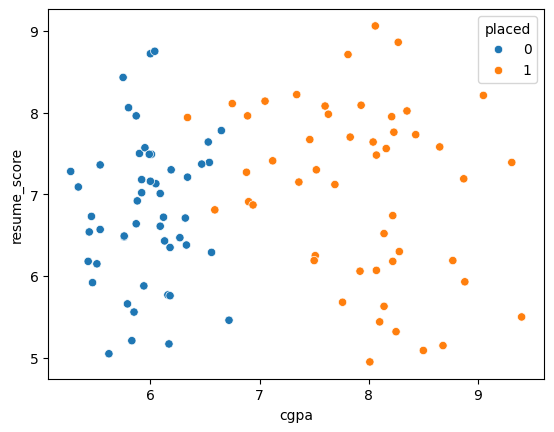

In [ ]:

sns.scatterplot(x=df['cgpa'], y=df['resume_score'], hue=df['placed'])


In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
y

,placed
0,1
1,0
2,1
3,1
4,1
...,...
95,0
96,1
97,0
98,1


In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [ ]:
p.fit(X,y)

Perceptron()

In [ ]:
p.coef_

array([[ 40.26, -36.  ]])

In [ ]:
p.intercept_

array([-25.])

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

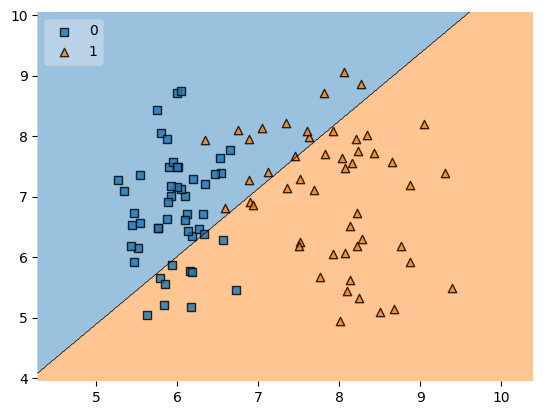

In [ ]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)

Of course! Here are the notes from the video on the Perceptron Trick.

### The Perceptron Trick: How a Simple Neuron Learns

This lecture covers the fundamental algorithm for training a single Perceptron. The goal is to find the correct weights and biases that allow the Perceptron to correctly classify linearly separable data. The method used is an intuitive and iterative process called the **Perceptron Trick**.

#### The Core Idea and Geometric Intuition

The algorithm is based on a simple, iterative idea:

1.  **Start with a random line.** For a 2D dataset, the Perceptron acts as a linear separator. The algorithm begins by drawing a random line, which means initializing the weights (coefficients) and bias (intercept) with random values. This initial line will likely misclassify many data points.
2.  **Pick a misclassified point.** The algorithm randomly selects a data point that is currently on the wrong side of the line.
3.  **Adjust the line.** The line's equation is updated to move it slightly closer to the misclassified point, with the goal of classifying it correctly.
4.  **Repeat.** This process is repeated for a set number of iterations (called epochs) or until the line correctly classifies all the points. Through these small, iterative adjustments, the line gradually "learns" the optimal position to separate the two classes.

#### The Perceptron Trick Algorithm

The update rule for the weights can be simplified into a single, elegant formula.

**Simplified Update Rule:**

`W_new = W_old + η * (y - ŷ) * x`

Where:
*   **W_new** is the updated vector of weights.
*   **W_old** is the current vector of weights.
*   **η (eta)** is the learning rate, a small number (e.g., 0.1 or 0.01) that controls how large the adjustments are.
*   **y** is the *actual* label of the randomly selected point (e.g., 0 or 1).
*   **ŷ (y-hat)** is the *predicted* label from the Perceptron for that point.
*   **x** is the feature vector of the selected point.

**How it Works:**

This single rule cleverly handles all possible scenarios:

*   **Correct Classification:** If the point is classified correctly, `y` and `ŷ` are the same (`1-1=0` or `0-0=0`). The term `(y - ŷ)` becomes zero, and no update is made to the weights.
*   **Misclassification (Case 1):** A positive point (actual y=1) is classified as negative (predicted ŷ=0). The term `(y - ŷ)` becomes `(1-0) = 1`. The weights are updated by adding a fraction of the point's feature vector, nudging the line closer to it.
*   **Misclassification (Case 2):** A negative point (actual y=0) is classified as positive (predicted ŷ=1). The term `(y - ŷ)` becomes `(0-1) = -1`. The weights are updated by *subtracting* a fraction of the point's feature vector, again pushing the line toward the misclassified point.

#### Implementation Steps

The algorithm is implemented in code as follows:

1.  **Prepare Data:** To handle the bias term (intercept) elegantly, a column of ones is added to the input feature matrix `X`. This allows the bias to be treated as just another weight.
2.  **Initialize:**
    *   Create a weight vector (e.g., all ones or random numbers) with a size equal to the number of input features (plus one for the bias).
    *   Set a learning rate (`lr`).
    *   Set the number of iterations (`epochs`).
3.  **Training Loop:**
    *   Loop for the specified number of `epochs`.
    *   Inside the loop, select a random data point `X[j]`.
    *   Calculate the dot product of the point `X[j]` and the current `weights`.
    *   Use a **step function** to determine the prediction (`y_hat`). If the dot product is >= 0, the prediction is 1; otherwise, it's 0.
    *   Apply the update rule to adjust the weights.
4.  **Final Weights:** After the loop finishes, the resulting weight vector represents the learned parameters for the separating line.

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [ ]:
import matplotlib.pyplot as plt

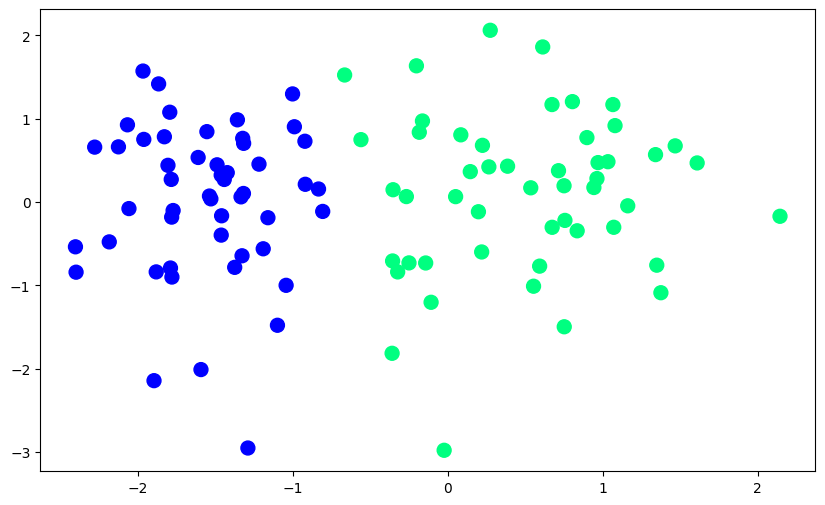

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]


In [ ]:
def step(z):
    return 1 if z>0 else 0

In [ ]:
intercept_,coef_ = perceptron(X,y)

In [ ]:
print(coef_)
print(intercept_)

[1.29329432 0.09905252]
0.9


In [ ]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

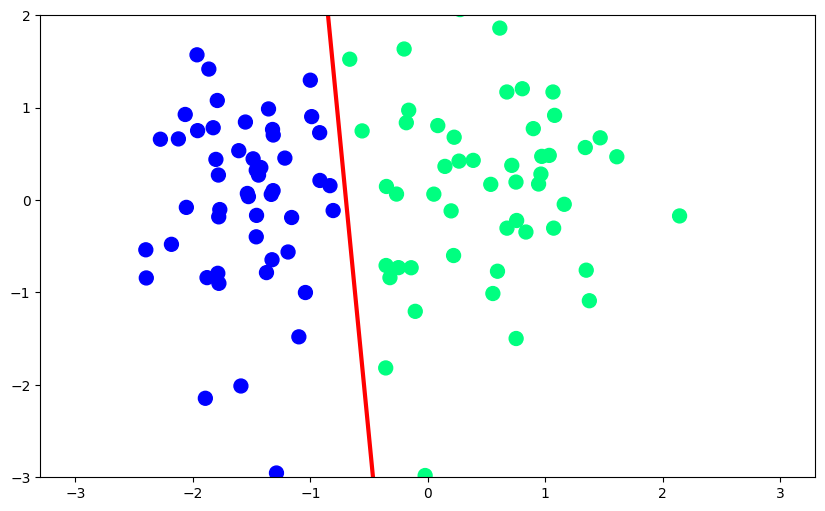

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

| Aspect          | Perceptron Strengths                  | Perceptron Weaknesses                              |
| --------------- | ------------------------------------- | -------------------------------------------------- |
| Complexity      | Simple and lightweight                | Too basic for real-world complex problems          |
| Data Handling   | Works for linearly separable problems | Fails for nonlinear separable problems (e.g., XOR) |
| Output          | Fast binary classification            | No probability or soft classification              |
| Model Structure | Easy to implement                     | Single-layer only – can’t capture complexity       |
